In [1]:
# a) Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
print("Imports success!")

Imports success!


In [2]:
# b) Load the training and testing data (MNIST)

# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

with np.load(r"C:\Users\kusha\Desktop\mnist_dataset.npz") as data:
    x_train = data["X_train"]
    y_train = data["y_train"]
    x_test  = data["X_test"]
    y_test  = data["y_test"]

print(
    f"x_train:\n"
    f"  Data type: {x_train.dtype}\n"
    f"  Shape    : {x_train.shape}\n"
    f"  Pixel value range: {x_train.min()} to {x_train.max()}\n\n"
)

print(
    f"y_train:\n"
    f"  Data type: {y_train.dtype}\n"
    f"  Shape    : {y_train.shape}\n"
    f"  First 10 labels: {y_train[:10]}\n"
)

print(
    f"x_test:\n"
    f"  Data type: {x_test.dtype}\n"
    f"  Shape    : {x_test.shape}\n"
    f"  Pixel value range: {x_test.min()} to {x_test.max()}\n\n"
)

print(
    f"y_test:\n"
    f"  Data type: {y_test.dtype}\n"
    f"  Shape    : {y_test.shape}\n"
    f"  First 10 labels: {y_test[:10]}\n"
)

print(f"First image sample of x_train (pixel values):\n{x_train[0]}\n")

x_train:
  Data type: uint8
  Shape    : (60000, 28, 28)
  Pixel value range: 0 to 255


y_train:
  Data type: uint8
  Shape    : (60000,)
  First 10 labels: [5 0 4 1 9 2 1 3 1 4]

x_test:
  Data type: uint8
  Shape    : (10000, 28, 28)
  Pixel value range: 0 to 255


y_test:
  Data type: uint8
  Shape    : (10000,)
  First 10 labels: [7 2 1 0 4 1 4 9 5 9]

First image sample of x_train (pixel values):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0

In [3]:
# c) Define the network architecture using Keras
# Preprocess - normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

print(
    f"\nAfter normalization:\n"
    f"x_train:\n"
    f"  Data type: {x_train.dtype}\n"
    f"  Shape    : {x_train.shape}\n"
    f"  Pixel value range: {x_train.min()} to {x_train.max()}\n\n"

    f"x_test:\n"
    f"  Data type: {x_test.dtype}\n"
    f"  Shape    : {x_test.shape}\n"
    f"  Pixel value range: {x_test.min()} to {x_test.max()}\n\n"

    f"  Sample normalized image of x_train (first image pixels):\n{x_train[0]}\n"
)


After normalization:
x_train:
  Data type: float32
  Shape    : (60000, 28, 28)
  Pixel value range: 0.0 to 1.0

x_test:
  Data type: float32
  Shape    : (10000, 28, 28)
  Pixel value range: 0.0 to 1.0

  Sample normalized image of x_train (first image pixels):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.     

In [4]:
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# d) Train the model using SGD optimizer
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    verbose=2
)

Epoch 1/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8299 - loss: 0.6760 - val_accuracy: 0.9004 - val_loss: 0.3689
Epoch 2/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9044 - loss: 0.3427 - val_accuracy: 0.9159 - val_loss: 0.2990
Epoch 3/10
1875/1875 - 3s - 1ms/step - accuracy: 0.9182 - loss: 0.2915 - val_accuracy: 0.9250 - val_loss: 0.2632
Epoch 4/10
1875/1875 - 3s - 1ms/step - accuracy: 0.9267 - loss: 0.2595 - val_accuracy: 0.9314 - val_loss: 0.2392
Epoch 5/10
1875/1875 - 3s - 1ms/step - accuracy: 0.9341 - loss: 0.2355 - val_accuracy: 0.9381 - val_loss: 0.2192
Epoch 6/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9398 - loss: 0.2163 - val_accuracy: 0.9422 - val_loss: 0.2026
Epoch 7/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9442 - loss: 0.2004 - val_accuracy: 0.9461 - val_loss: 0.1895
Epoch 8/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9474 - loss: 0.1864 - val_accuracy: 0.9492 - val_loss: 0.1781
Epoch 9/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9512 - loss: 0.1745 - val_accuracy: 0.9510 - 

In [6]:
# e) Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9451 - loss: 0.1869 

Test accuracy: 0.9538
Test loss: 0.1607


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


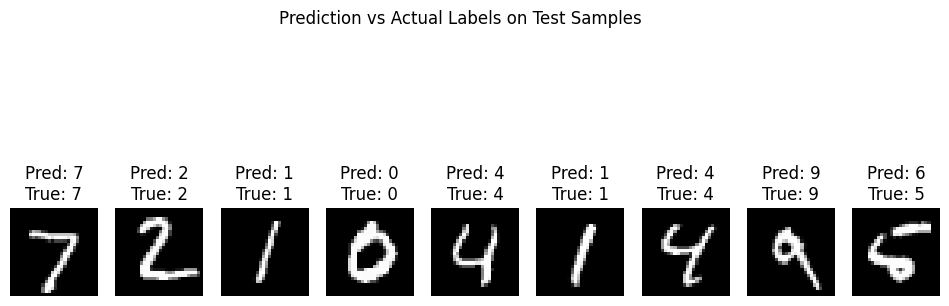

In [7]:
# Show predictions on test set samples
count = 9
predictions = model.predict(x_test[:count])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 5))
for i in range(count):
    plt.subplot(1, count, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.suptitle("Prediction vs Actual Labels on Test Samples")
plt.show()

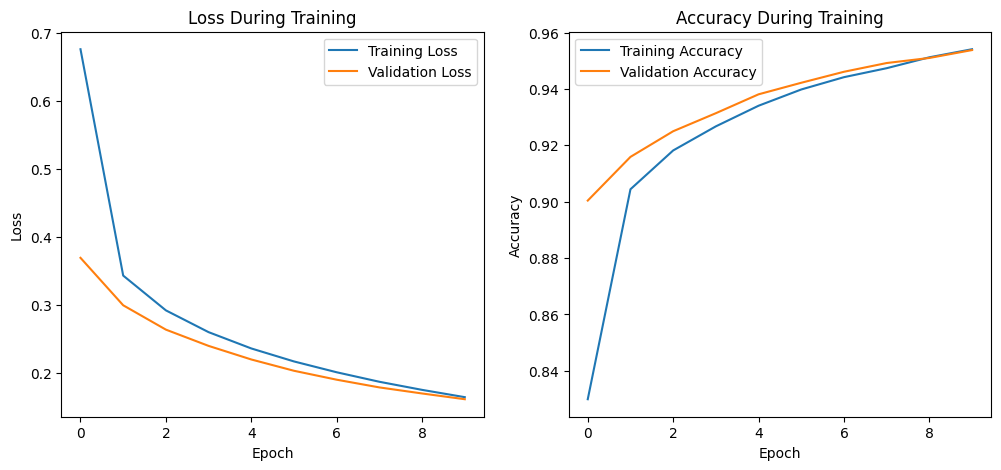

In [8]:
# f) Plot the training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
